In [1]:
#provided home phone and Internet services to 7043 customers in California in Q3.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from statsmodels.regression.linear_model import OLS
import random
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.tail(4))
# Gender
# Senior Citizen
# Partner 
# Dependents
# Tenure
# PhoneService
# MultipleLines
# InternetService
# OnlineSecurity
# DeviceProtection
# TechSupport
# StreamingTV
# StreamingMovies
# Cont
# PaperlessBilling
# PaymentMethod
# MonthlyCharges
# TotalCh

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No         

In [3]:
# It does not matter as it is still a binomial distribution
# Create the function
def transform_value(x):
    if x == 'Yes':
        result = 0
    else:
        result = 1
    return result
# Test the function
result1 = transform_value("Yes")
print(result1)
result2 = transform_value("No")
print(result2)

df['Churn'] = df['Churn'].apply(transform_value)

print(df['Churn'])

0
1
0       1
1       1
2       0
3       1
4       0
       ..
7038    1
7039    1
7040    1
7041    0
7042    1
Name: Churn, Length: 7043, dtype: int64


In [4]:
# Check for any missing values 
df.isnull().sum()
# It appears that there are no missing values in this dataset

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Check for duplicates
df.duplicated().sum()

# It appears that there are no duplicates.

0

Text(0.5, 1.0, 'Count of Gender-Based Customer Churn')

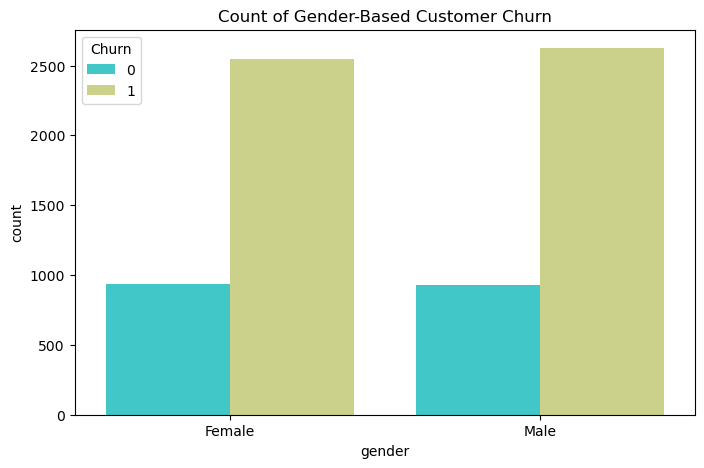

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x='gender',data=df, palette='rainbow',hue='Churn')
plt.title("Count of Gender-Based Customer Churn")

In [7]:
# Create a plot based on gender
# 0 means they stayed with the same company/ 1 means they left
cross_tab = pd.crosstab(df['gender'], df['Churn'])
print(cross_tab)
ratio_cust_female = cross_tab.iloc[0, 1]/cross_tab.iloc[0, 0]
print(ratio_cust_female)
ratio_cust_churn_male = cross_tab.iloc[1, 1]/cross_tab.iloc[1, 0]
print(ratio_cust_churn_male)

# Regardless of the gender of the customer, it appears that there is a twice as likely chance of customers leaving the company

Churn     0     1
gender           
Female  939  2549
Male    930  2625
2.714589989350373
2.8225806451612905


Text(0.5, 1.0, 'The count of customer churn occurrences among senior citizens.')

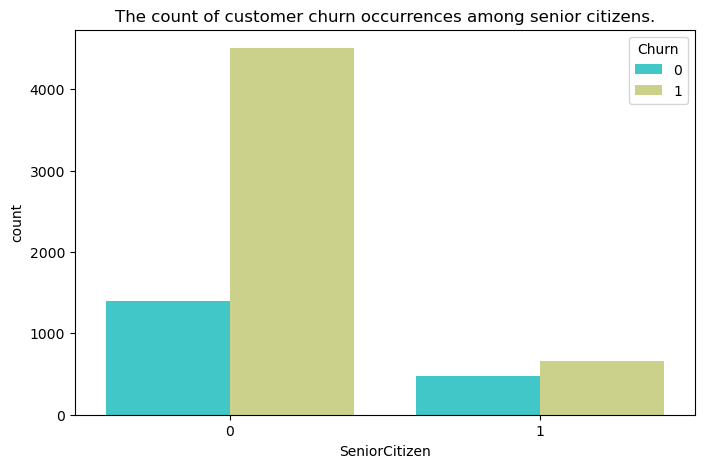

In [8]:
# Create a plot for the senior citizen 
# 0 means someone is less than 65 years old
# 1 means someone is more than 65 years old
# 0 means they stayed with the same company/ 1 means they left
plt.figure(figsize=(8,5))
sns.countplot(x='SeniorCitizen',data=df, palette='rainbow',hue='Churn')
plt.title("The count of customer churn occurrences among senior citizens.")

In [9]:
# Most their customers have less than 65 years old
# On average, ...% are likely to leave the company regardless of their age
cross_tab2 = pd.crosstab(df['SeniorCitizen'], df['Churn'])
print(cross_tab2)
ratio_cust_churn_65_less = cross_tab2.iloc[0, 1]/cross_tab2.iloc[0, 0]
print(ratio_cust_churn_65_less)
ratio_cust_churn_abv_65 = cross_tab2.iloc[1, 1]/cross_tab2.iloc[1, 0]
print(ratio_cust_churn_abv_65)

# The company has more senior citizens less than 65 years. Out of this number, customers are 3 times more likely to leave the company. 

Churn             0     1
SeniorCitizen            
0              1393  4508
1               476   666
3.236180904522613
1.3991596638655461


Text(0.5, 1.0, 'The count of customer churn occurrences among customers with different Internet Service.')

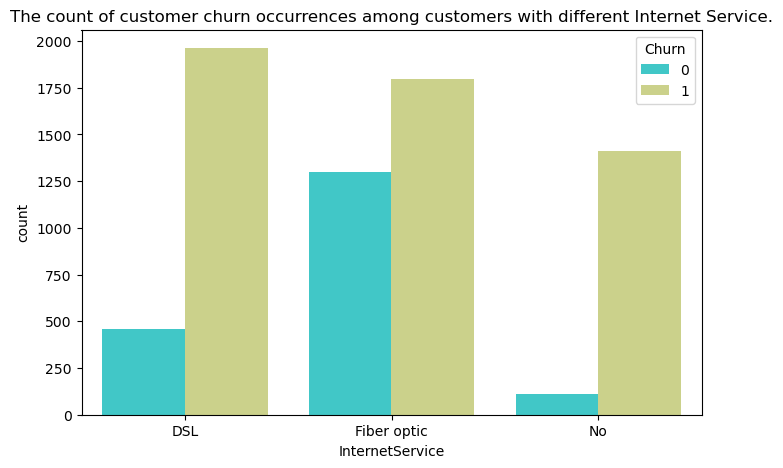

In [10]:
# 0 means they stayed with the same company/ 1 means they left
plt.figure(figsize=(8,5))
sns.countplot(x='InternetService',data=df, palette='rainbow',hue='Churn')
plt.title("The count of customer churn occurrences among customers with different Internet Service.")

In [11]:
# Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
cross_tab3 = pd.crosstab(df['InternetService'], df['Churn'])
print(cross_tab3)
ratio_cust_churn_DSL = cross_tab3.iloc[0, 1]/cross_tab3.iloc[0, 0]
print(ratio_cust_churn_DSL)
ratio_cust_churn_fib_opt = cross_tab3.iloc[1, 1]/cross_tab3.iloc[1, 0]
print(ratio_cust_churn_fib_opt)
ratio_cust_churn_no_int_serv = cross_tab3.iloc[2, 1]/cross_tab3.iloc[2, 0]
print(ratio_cust_churn_no_int_serv)
# Customers who do not use internet service are more likely to leave followed by the customers who are using fiber optics
# Customers who did not subscribe to their Internet Service service and 12 times more likely to leave the company. Followed by ,
# customers who subscribed to DSL. 

Churn               0     1
InternetService            
DSL               459  1962
Fiber optic      1297  1799
No                113  1413
4.2745098039215685
1.387047031611411
12.504424778761061


Text(0.5, 1.0, 'The count of customer churn occurrences among customers with different Payment Methods.')

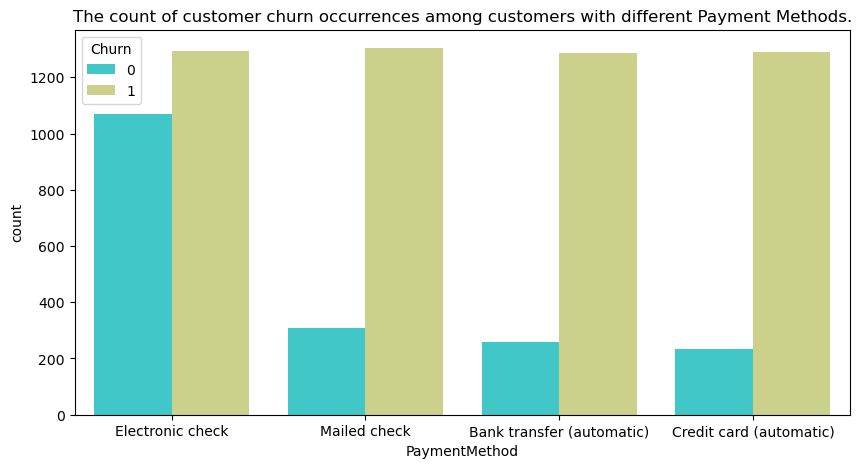

In [12]:
# 0 means they stayed with the same company/ 1 means they left
plt.figure(figsize=(10,5))
sns.countplot(x='PaymentMethod',data=df, palette='rainbow',hue='Churn')
plt.title("The count of customer churn occurrences among customers with different Payment Methods.")

In [13]:
# PaymentMethod: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
cross_tab4 = pd.crosstab(df['PaymentMethod'], df['Churn'])
print(cross_tab4)
ratio_cust_bank = cross_tab4.iloc[0, 1]/cross_tab4.iloc[0, 0]
print(ratio_cust_bank)
ratio_cust_churn_credit_card = cross_tab4.iloc[1, 1]/cross_tab4.iloc[1, 0]
print(ratio_cust_churn_credit_card )
ratio_cust_churn_elec_check = cross_tab4.iloc[2, 1]/cross_tab4.iloc[2, 0]
print(ratio_cust_churn_elec_check)
ratio_cust_churn_mail_check = cross_tab4.iloc[3, 1]/cross_tab4.iloc[3, 0]
print(ratio_cust_churn_mail_check)

# It appears that customer who utilized credit cards are 5 times more likely to leave the company. This trend can be observed
# for all the other payment method except for the electronic check.


Churn                         0     1
PaymentMethod                        
Bank transfer (automatic)   258  1286
Credit card (automatic)     232  1290
Electronic check           1071  1294
Mailed check                308  1304
4.984496124031008
5.560344827586207
1.2082166199813258
4.233766233766234


Text(0.5, 1.0, 'The number of customer churn cases within both the group of customers with dependents and the group without dependents')

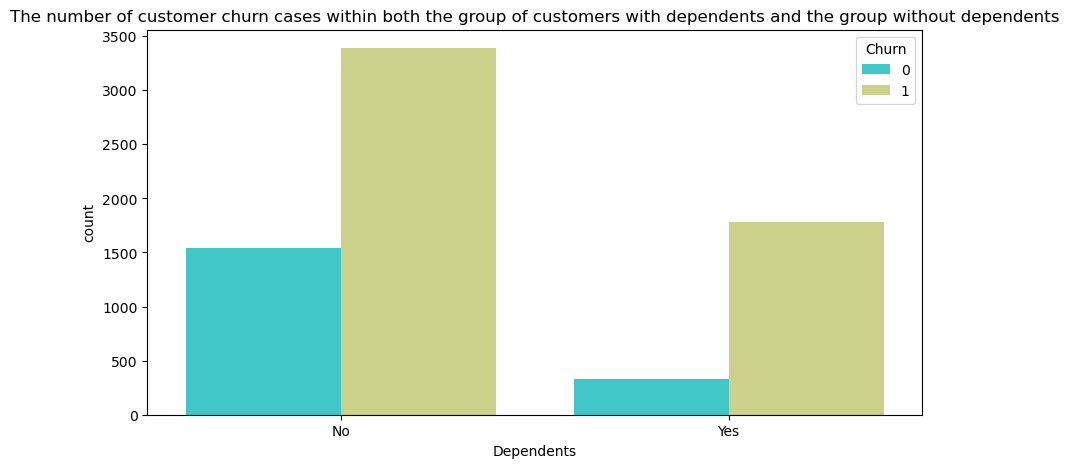

In [14]:
# 0 means they stayed with the same company/ 1 means they left
plt.figure(figsize=(10,5))
sns.countplot(x='Dependents',data=df, palette='rainbow',hue='Churn')
plt.title("The number of customer churn cases within both the group of customers with dependents and the group without dependents")

In [15]:
# Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
cross_tab6 = pd.crosstab(df['Dependents'], df['Churn'])
print(cross_tab6)
ratio_cust_no_dependent = cross_tab6.iloc[0, 1]/cross_tab6.iloc[0, 0]
print(ratio_cust_no_dependent)
ratio_cust_churn_yes_dependent = cross_tab6.iloc[1, 1]/cross_tab6.iloc[1, 0]
print(ratio_cust_churn_yes_dependent)
# It appears that customers who are depending on someone else are 5 times more likely to leave the company.

Churn          0     1
Dependents            
No          1543  3390
Yes          326  1784
2.1970187945560595
5.47239263803681


In [16]:
# Tenure: Indicates the total amount of months that the customer has been with the company 
# by the end of the quarter specified above
# Cross tab can be only applied to two categorical variables
# It is crucial to build categories 

#The customer with more than 36 months are considered verylongtermcustomers
#The customer between 12 and 35 months are considered longtermcustomers
#The customer between 6 and 11 months are considered midtermcustomers
# The customer between 3 and 5 months are considered earlystagetermcustomers
# The customer with less than are considered newcustomers

# First filter the data frame to only include churn and tenure
# Then apply the conditional statements

first_condition = df['tenure'] > 36
second_condition = (df['tenure'] >= 12) & (df['tenure'] <= 35)
third_condition = (df['tenure'] >= 6) & (df['tenure'] <= 11)
fourth_condition = (df['tenure'] >= 3) & (df['tenure'] <= 5)
fifth_condition = df['tenure'] < 3

conditions = [
    first_condition,
    second_condition,
    third_condition,
    fourth_condition,
    fifth_condition,
]

values = [
    'verylongtermcustomers',
    'longtermcustomers',
    'midtermcustomers',
    'earlystagetermcustomers',
    'newcustomers',  
]

# Create the 'CustomerType' column based on conditions and values
df['CustomerType'] = np.select(conditions, values, default = 'recently_onboarded_customers')

# Display the DataFrame
print(df)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

Text(0.5, 1.0, 'The number of customer churn based on customer types')

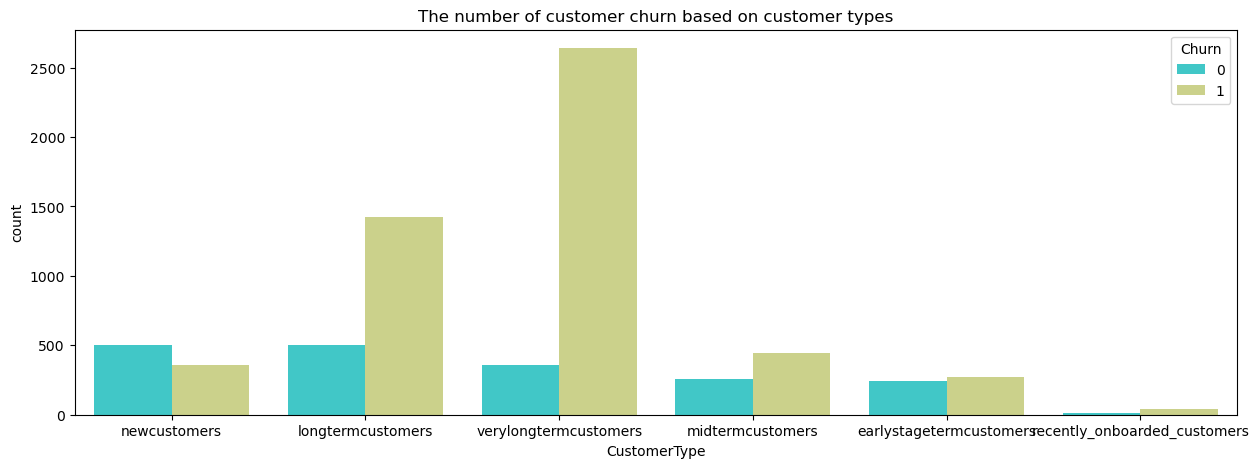

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(x='CustomerType',data=df, palette='rainbow',hue='Churn')
plt.title("The number of customer churn based on customer types")

In [18]:
# 0 means they stayed with the same company and 1 means they left
cross_tab7 = pd.crosstab(df['CustomerType'], df['Churn'])
print(cross_tab7)
ratio_cust_earlystagecus = cross_tab7.iloc[0, 1]/cross_tab7.iloc[0, 0]
print(ratio_cust_earlystagecus)
ratio_cust_longtermcus = cross_tab7.iloc[1, 1]/cross_tab7.iloc[1, 0]
print(ratio_cust_longtermcus)
ratio_cust_midtermcus = cross_tab7.iloc[2, 1]/cross_tab7.iloc[2, 0]
print(ratio_cust_midtermcus)
ratio_cust_newcus = cross_tab7.iloc[3, 1]/cross_tab7.iloc[3, 0]
print(ratio_cust_newcus)
ratio_cust_verylongterm = cross_tab7.iloc[5, 1]/cross_tab7.iloc[5, 0]
print(ratio_cust_verylongterm)

# It appears that very long term constumers are 7 times more likely to leave. 
# Early stage customers are less likely to leave

Churn                           0     1
CustomerType                           
earlystagetermcustomers       241   268
longtermcustomers             502  1421
midtermcustomers              255   443
newcustomers                  503   359
recently_onboarded_customers   10    40
verylongtermcustomers         358  2643
1.112033195020747
2.8306772908366535
1.7372549019607844
0.7137176938369781
7.38268156424581


Text(0.5, 1.0, 'The number of customer churn occurance among customers with various phone services.')

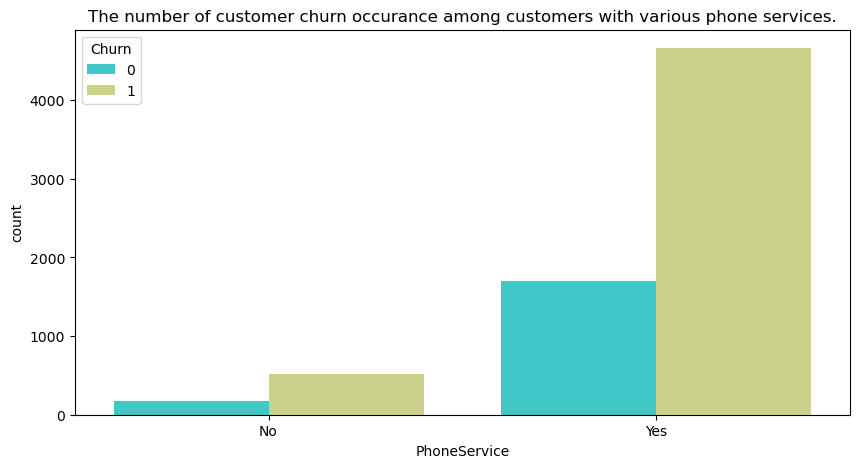

In [19]:
# 0 means they stayed with the same company/ 1 means they left
plt.figure(figsize=(10,5))
sns.countplot(x='PhoneService',data=df, palette='rainbow',hue='Churn')
plt.title("The number of customer churn occurance among customers with various phone services.")

In [20]:
#Indicates if the customer subscribes to home phone service with the company: Yes, No
cross_tab8 = pd.crosstab(df['PhoneService'], df['Churn'])
print(cross_tab8)
ratio_cust_no_phone_service = cross_tab8.iloc[0, 1]/cross_tab8.iloc[0, 0]
print(ratio_cust_no_phone_service)
ratio_cust_yes_phone_service = cross_tab8.iloc[1, 1]/cross_tab8.iloc[1, 0]
print(ratio_cust_yes_phone_service)
# Customers who have phone service are 2 times more likely to leave. Maybe gathering customer feedback on the service provided
# to assess the reason behind this discovery.

Churn            0     1
PhoneService            
No             170   512
Yes           1699  4662
3.011764705882353
2.7439670394349616


Text(0.5, 1.0, 'The number of customer churn occurance among customers with various phone lines.')

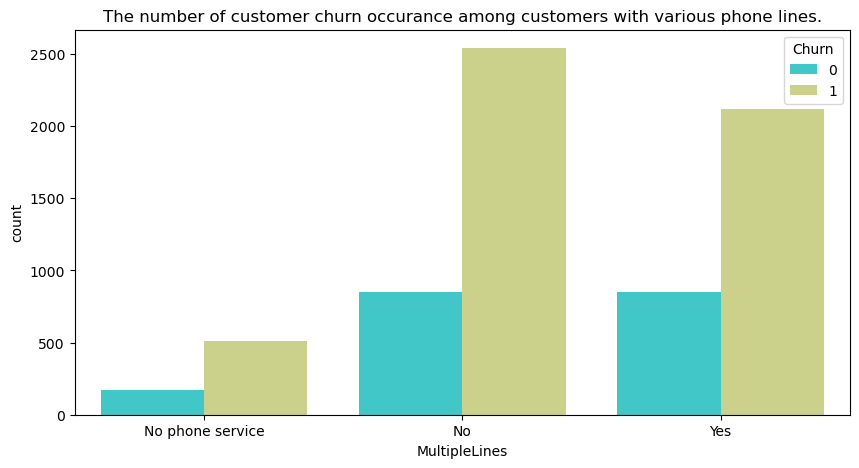

In [21]:
# 0 means they stayed with the same company/ 1 means they left
plt.figure(figsize=(10,5))
sns.countplot(x='MultipleLines',data=df, palette='rainbow',hue='Churn')
plt.title("The number of customer churn occurance among customers with various phone lines.")

In [22]:
# Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
cross_tab9= pd.crosstab(df['MultipleLines'], df['Churn'])
print(cross_tab9)
ratio_cust_no_phone_service2 = cross_tab9.iloc[0, 1]/cross_tab9.iloc[0, 0]
print(ratio_cust_no_phone_service2)
ratio_cust_no_multiple_line = cross_tab9.iloc[1, 1]/cross_tab9.iloc[1, 0]
print(ratio_cust_no_multiple_line)
ratio_cust_yes_multiple_line = cross_tab9.iloc[2, 1]/cross_tab9.iloc[2, 0]
print(ratio_cust_yes_multiple_line )

# We can conclude that Customers with no phone service are 3 times more likely to leave the company closely followed by those
# who did not subscribe to multiple lines.

Churn               0     1
MultipleLines              
No                849  2541
No phone service  170   512
Yes               850  2121
2.9929328621908127
3.011764705882353
2.4952941176470587


Text(0.5, 1.0, 'The number of customer churn occurance among customers with various online security.')

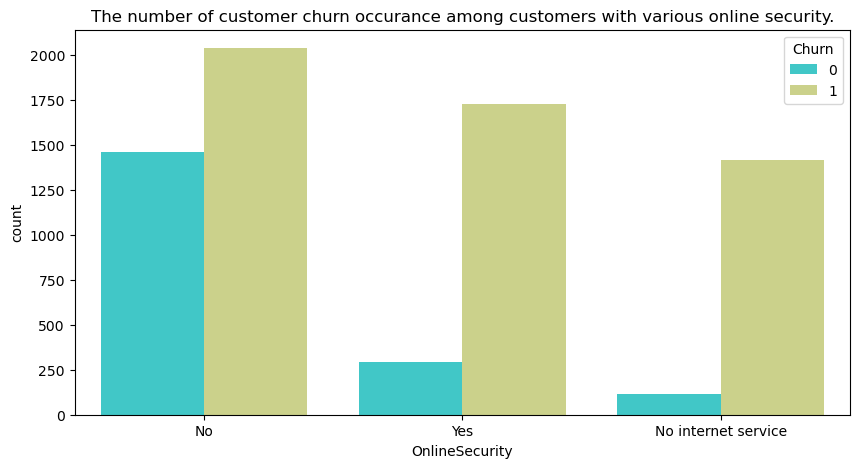

In [23]:
# 0 means they stayed with the same company/ 1 means they left
plt.figure(figsize=(10,5))
sns.countplot(x='OnlineSecurity',data=df, palette='rainbow',hue='Churn')
plt.title("The number of customer churn occurance among customers with various online security.")

In [24]:
#  Indicates if the customer subscribes to an additional online security service provided by the company
cross_tab10 = pd.crosstab(df['OnlineSecurity'], df['Churn'])
print(cross_tab10)
ratio_cust_no_online_security = cross_tab10.iloc[0, 1]/cross_tab10.iloc[0, 0]
print(ratio_cust_no_online_security)
ratio_cust_no_int_service = cross_tab10.iloc[1, 1]/cross_tab10.iloc[1, 0]
print(ratio_cust_no_int_service)
ratio_cust_yes_online_security = cross_tab10.iloc[2, 1]/cross_tab10.iloc[2, 0]
print(ratio_cust_yes_online_security)

# Customers with no internet service are 12 more likely to leave the company. It should be investigated the reason why 
# customers with no online security service are less likely to leave in comparison to those with the service.

Churn                   0     1
OnlineSecurity                 
No                   1461  2037
No internet service   113  1413
Yes                   295  1724
1.3942505133470227
12.504424778761061
5.84406779661017


Text(0.5, 1.0, 'The number of customer churn occurance among customers with various device protection.')

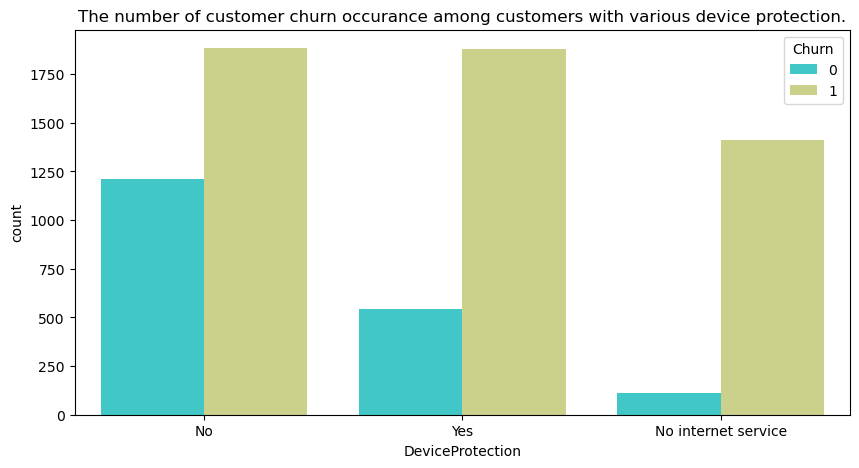

In [25]:
# 0 means they stayed with the same company/ 1 means they left
plt.figure(figsize=(10,5))
sns.countplot(x='DeviceProtection',data=df, palette='rainbow',hue='Churn')
plt.title("The number of customer churn occurance among customers with various device protection.")

In [26]:
# Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
cross_tab11 = pd.crosstab(df['DeviceProtection'], df['Churn'])
print(cross_tab11)
ratio_cust_no_device_prot = cross_tab11.iloc[0, 1]/cross_tab11.iloc[0, 0]
print(ratio_cust_no_device_prot)
ratio_cust_no_int_service3 = cross_tab11.iloc[1, 1]/cross_tab11.iloc[1, 0]
print(ratio_cust_no_int_service3)
ratio_cust_yes_device_prot = cross_tab11.iloc[2, 1]/cross_tab11.iloc[2, 0]
print(ratio_cust_yes_device_prot)

# It appears that customers with no internet service are 12 times more likely to leave followed by the customers who
# possess a device protection plan. This should be more look into.

Churn                   0     1
DeviceProtection               
No                   1211  1884
No internet service   113  1413
Yes                   545  1877
1.5557390586292321
12.504424778761061
3.4440366972477063


Text(0.5, 1.0, 'The number of customer churn occurance among customers with various technical support.')

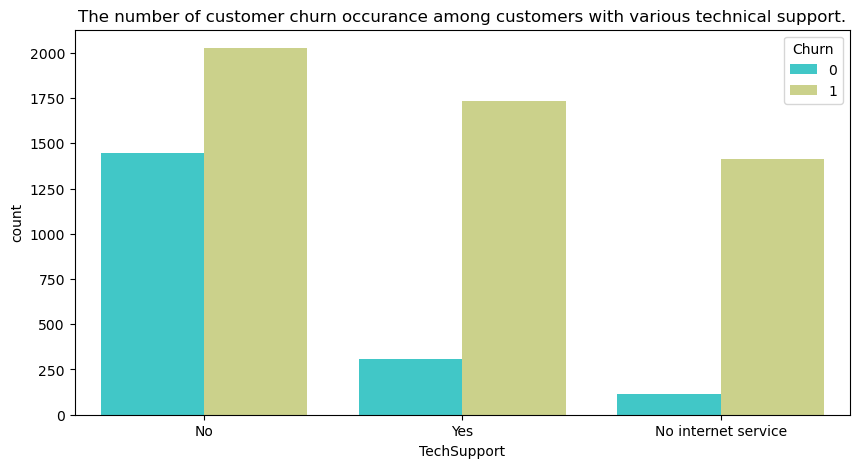

In [27]:
# 0 means they stayed with the same company/ 1 means they left
plt.figure(figsize=(10,5))
sns.countplot(x='TechSupport',data=df, palette='rainbow',hue='Churn')
plt.title("The number of customer churn occurance among customers with various technical support.")

In [28]:
# Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
cross_tab12 = pd.crosstab(df['TechSupport'], df['Churn'])
print(cross_tab12)
ratio_cust_no_tech_sup = cross_tab12.iloc[0, 1]/cross_tab12.iloc[0, 0]
print(ratio_cust_no_tech_sup)
ratio_cust_no_int_service4 = cross_tab12.iloc[1, 1]/cross_tab12.iloc[1, 0]
print(ratio_cust_no_int_service4)
ratio_cust_yes_tech_sup = cross_tab12.iloc[2, 1]/cross_tab12.iloc[2, 0]
print(ratio_cust_yes_tech_sup)

# It appears that customers with no internet service are 12 times more likely to leave the company followed by those
# with additional technical support.

Churn                   0     1
TechSupport                    
No                   1446  2027
No internet service   113  1413
Yes                   310  1734
1.4017980636237897
12.504424778761061
5.593548387096774


Text(0.5, 1.0, 'The number of customer churn occurance among customers with various stream televisions.')

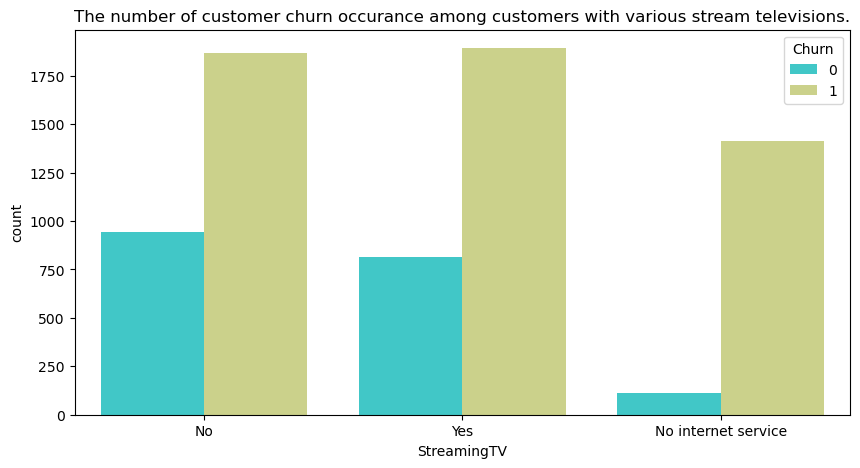

In [29]:
# 0 means they stayed with the same company/ 1 means they left
plt.figure(figsize=(10,5))
sns.countplot(x='StreamingTV',data=df, palette='rainbow',hue='Churn')
plt.title("The number of customer churn occurance among customers with various stream televisions.")

In [30]:
# Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. 
# The company does not charge an additional fee for this service.
cross_tab13 = pd.crosstab(df['StreamingTV'], df['Churn'])
print(cross_tab13)
ratio_cust_no_stream_tv = cross_tab13.iloc[0, 1]/cross_tab13.iloc[0, 0]
print(ratio_cust_no_stream_tv)
ratio_cust_no_int_service5 = cross_tab13.iloc[1, 1]/cross_tab13.iloc[1, 0]
print(ratio_cust_no_int_service5)
ratio_cust_yes_stream_tv = cross_tab13.iloc[2, 1]/cross_tab13.iloc[2, 0]
print(ratio_cust_yes_stream_tv)

# It appears that customers with no internet service are 12 times more likely to leave the company followed by those
# who are streaming television programming.

Churn                  0     1
StreamingTV                   
No                   942  1868
No internet service  113  1413
Yes                  814  1893
1.9830148619957537
12.504424778761061
2.3255528255528257


Text(0.5, 1.0, 'The number of customer churn occurance among customers with various stream movies.')

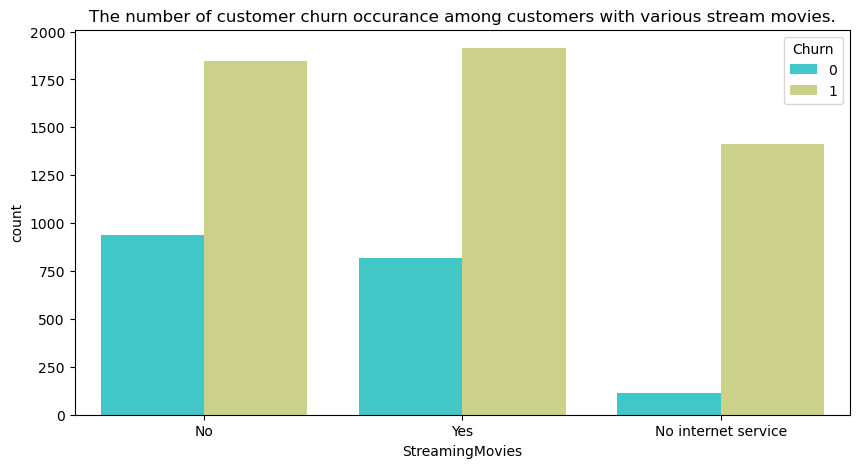

In [31]:
# 0 means they stayed with the same company/ 1 means they left
plt.figure(figsize=(10,5))
sns.countplot(x='StreamingMovies',data=df, palette='rainbow',hue='Churn')
plt.title("The number of customer churn occurance among customers with various stream movies.")

In [32]:
# Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. 
# The company does not charge an additional fee for this service.
cross_tab14 = pd.crosstab(df['StreamingMovies'], df['Churn'])
print(cross_tab14)
ratio_cust_no_streammov = cross_tab14.iloc[0, 1]/cross_tab14.iloc[0, 0]
print(ratio_cust_no_streammov)
ratio_cust_no_int2 = cross_tab14.iloc[1, 1]/cross_tab14.iloc[1, 0]
print(ratio_cust_no_int2)
ratio_cust_yes_streammov = cross_tab14.iloc[2, 1]/cross_tab14.iloc[2, 0]
print(ratio_cust_yes_streammov)


Churn                  0     1
StreamingMovies               
No                   938  1847
No internet service  113  1413
Yes                  818  1914
1.9690831556503199
12.504424778761061
2.3398533007334965


Text(0.5, 1.0, 'The number of customer churn occurance among customers with various contracts.')

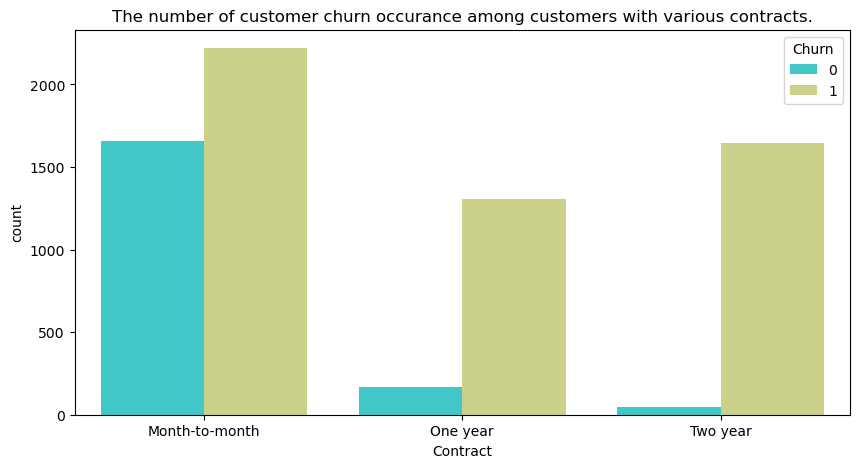

In [33]:
# 0 means they stayed with the same company/ 1 means they left
plt.figure(figsize=(10,5))
sns.countplot(x='Contract',data=df, palette='rainbow',hue='Churn')
plt.title("The number of customer churn occurance among customers with various contracts.")

In [34]:
# Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
cross_tab15 = pd.crosstab(df['Contract'], df['Churn'])
print(cross_tab15)
ratio_churn_m_t_m = cross_tab15.iloc[0, 1]/cross_tab15.iloc[0, 0]
print(ratio_churn_m_t_m)
ratio_churn_one_year = cross_tab15.iloc[1, 1]/cross_tab15.iloc[1, 0]
print(ratio_churn_one_year)
ratio_cust_two_year = cross_tab15.iloc[2, 1]/cross_tab15.iloc[2, 0]
print(ratio_cust_two_year)

# It appears that customers with two year contracts are 34 more likely to leave as well as those with a one-year contract. 
# There needs to be an explanation.

Churn              0     1
Contract                  
Month-to-month  1655  2220
One year         166  1307
Two year          48  1647
1.3413897280966767
7.873493975903615
34.3125


Text(0.5, 1.0, 'The number of customer churn occurance among customers who opted or not for paperless billing.')

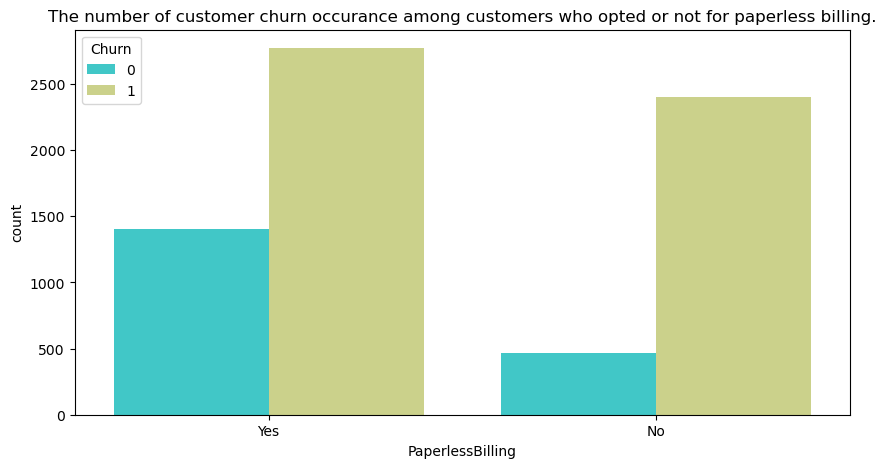

In [35]:
# 0 means they stayed with the same company/ 1 means they left
plt.figure(figsize=(10,5))
sns.countplot(x='PaperlessBilling',data=df, palette='rainbow',hue='Churn')
plt.title("The number of customer churn occurance among customers who opted or not for paperless billing.")

In [36]:
# Indicates if the customer has chosen paperless billing: Yes, No
cross_tab16 = pd.crosstab(df['PaperlessBilling'], df['Churn'])
print(cross_tab16)
ratio_churn_no_paper = cross_tab16.iloc[0, 1]/cross_tab16.iloc[0, 0]
print(ratio_churn_no_paper )
ratio_churn_yes_paper = cross_tab16.iloc[1, 1]/cross_tab16.iloc[1, 0]
print(ratio_churn_yes_paper )

# It appears than customers with no paperlessbilling are 5 more times likely to leave the company in comparison to those 
# who opted for the option. 

Churn                0     1
PaperlessBilling            
No                 469  2403
Yes               1400  2771
5.1236673773987205
1.9792857142857143


Text(0.5, 1.0, 'The number of customer churn occurance among customers who opted or not for paperless billing.')

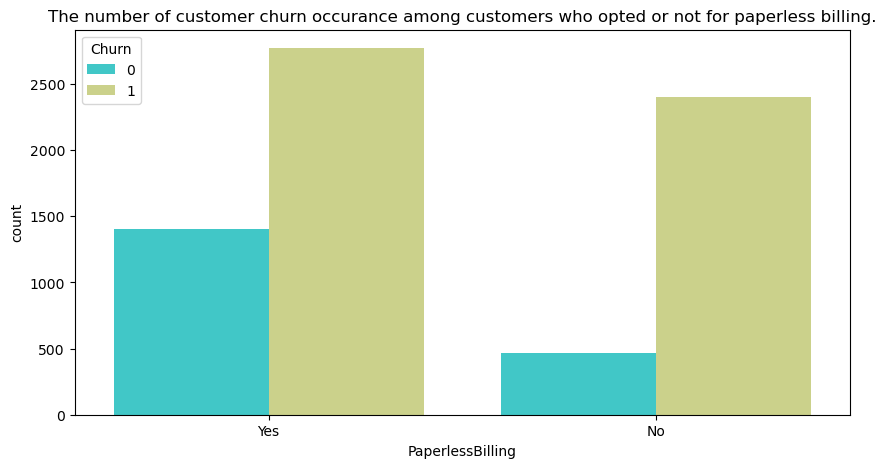

In [37]:
# 0 means they stayed with the same company/ 1 means they left
plt.figure(figsize=(10,5))
sns.countplot(x='PaperlessBilling',data=df, palette='rainbow',hue='Churn')
plt.title("The number of customer churn occurance among customers who opted or not for paperless billing.")

In [38]:
# First filter the data frame to only include churn and tenure
# Then apply the conditional statements

# Indicates the customer’s current total monthly charge for all their services from the company.
# Low below 50
# medium between 50 and 100
# high above 100

first_condition2 = df['MonthlyCharges'] > 100
second_condition2 = (df['MonthlyCharges'] >= 50) & (df['MonthlyCharges'] <= 100)
third_condition2 = df['MonthlyCharges'] < 50

filtered_df3 = df.copy()

conditions = [
    first_condition2,
    second_condition2,
    third_condition2
]

values = [
    'high',
    'medium',
    'low'
]

# Create the 'CustomerType' column based on conditions and values
df['MonthlyCharges'] = np.select(conditions, values)

# Display the DataFrame
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

Text(0.5, 1.0, 'The number of customer churn occurance based on monthly charges')

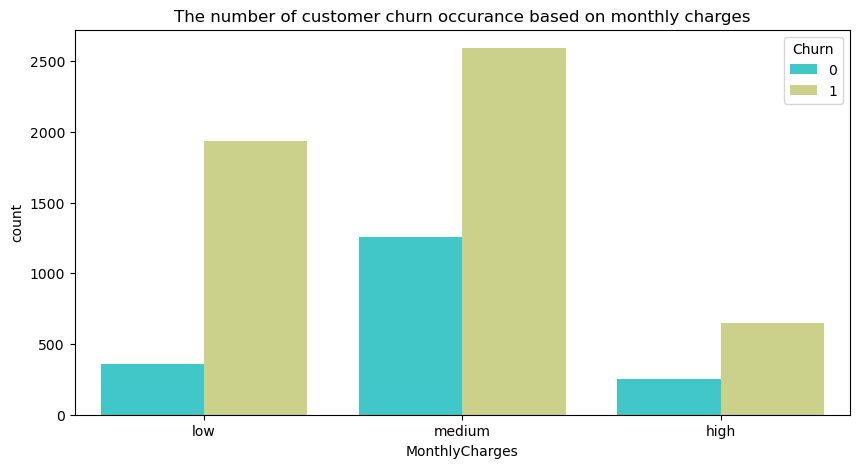

In [39]:
# 0 means they stayed with the same company/ 1 means they left
plt.figure(figsize=(10,5))
sns.countplot(x='MonthlyCharges',data=df, palette='rainbow',hue='Churn')
plt.title("The number of customer churn occurance based on monthly charges")

In [40]:
cross_tab17 = pd.crosstab(df['MonthlyCharges'], df['Churn'])
print(cross_tab17)
ratio_churn_high_monthly_char = cross_tab17.iloc[0, 1]/cross_tab17.iloc[0, 0]
print(ratio_churn_high_monthly_char)
ratio_churn_low_monthly_char = cross_tab17.iloc[1, 1]/cross_tab17.iloc[1, 0]
print(ratio_churn_low_monthly_char)
ratio_churn_med_monthly_char = cross_tab17.iloc[2, 1]/cross_tab17.iloc[2, 0]
print(ratio_churn_med_monthly_char)

# It appears that customers who have low monthly charges tend to be 5 more likely to leave the company.

Churn              0     1
MonthlyCharges            
high             253   649
low              361  1933
medium          1255  2592
2.5652173913043477
5.354570637119114
2.065338645418327


In [41]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Convert column to numeric values

In [42]:
# low is below $1000
# Medium is between 1000 and 5000
# high above $5000
first_condition3 = df['TotalCharges'] > 5000
second_condition3 = (df['TotalCharges'] >= 1000) & (df['TotalCharges'] <= 5000)
third_condition3 = df['TotalCharges'] < 1000

filtered_df4 = df.copy()

conditions = [
    first_condition3,
    second_condition3,
    third_condition3
]

values = [
    'high',
    'medium',
    'low'
]

# Create the 'CustomerType' column based on conditions and values
df['TotalCharges'] = np.select(conditions, values)

# Display the DataFrame
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [43]:
cross_tab18 = pd.crosstab(df['TotalCharges'], df['Churn'])
print(cross_tab18)
ratio_churn_high_total_char = cross_tab18.iloc[1, 1]/cross_tab18.iloc[1, 0]
print(ratio_churn_high_total_char)
ratio_churn_low_monthly_char = cross_tab18.iloc[2, 1]/cross_tab18.iloc[2, 0]
print(ratio_churn_low_monthly_char )
ratio_churn_med_monthly_char = cross_tab18.iloc[3, 1]/cross_tab18.iloc[3, 0]
print(ratio_churn_med_monthly_char)

# It appears that customers with high total charges are 6 times more likely to leave the company followed by those
# who have medium total charges.

Churn            0     1
TotalCharges            
0                0    11
high           157   978
low           1070  1823
medium         642  2362
6.229299363057325
1.7037383177570093
3.6791277258566977


In [44]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CustomerType
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,low,low,1,newcustomers
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,medium,medium,1,longtermcustomers
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,medium,low,0,newcustomers
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),low,medium,1,verylongtermcustomers
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,medium,low,0,newcustomers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,medium,medium,1,longtermcustomers
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),high,high,1,verylongtermcustomers
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,low,low,1,midtermcustomers
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,medium,low,0,earlystagetermcustomers


In [45]:
# Split the data into training and testing sets
X = df[[  'OnlineSecurity',
          'InternetService',
          'MultipleLines',
          'PhoneService',
          'Dependents', 
          'Partner',
          'SeniorCitizen',
          'gender',
          'DeviceProtection', 
          'TechSupport', 
          'StreamingTV',
          'StreamingMovies', 
           'CustomerType',
          'Contract', 
          'PaperlessBilling',
          'PaymentMethod',
           'MonthlyCharges',
           'TotalCharges']]  # Replace with your actual feature columns
y = df['Churn'] 
X = pd.get_dummies(X, columns=['PaperlessBilling', 'gender', 'MonthlyCharges', 'TotalCharges', 'PaymentMethod', 'PhoneService', 'Contract', 'MultipleLines', 'StreamingTV', 'CustomerType', 'StreamingMovies', 'InternetService', 'OnlineSecurity','TechSupport', 'Dependents', 'Partner', 'DeviceProtection', 'TotalCharges', 'MonthlyCharges'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
df['CustomerType']

0                  newcustomers
1             longtermcustomers
2                  newcustomers
3         verylongtermcustomers
4                  newcustomers
                 ...           
7038          longtermcustomers
7039      verylongtermcustomers
7040           midtermcustomers
7041    earlystagetermcustomers
7042      verylongtermcustomers
Name: CustomerType, Length: 7043, dtype: object

In [46]:
#Check if there are imbalanced classes.
y_train.value_counts()

1    3635
0    1295
Name: Churn, dtype: int64

In [47]:
# Fix the imbalance
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index
random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))
X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

In [48]:
# The imbalanced classes are fixed
y_train.value_counts()


0    1295
1    1295
Name: Churn, dtype: int64

In [49]:
# Create and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

In [50]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [51]:
y_pred = logistic_model.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred)

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [54]:
classification_rep = classification_report(y_test, y_pred)

In [55]:
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7496450544249882
Confusion Matrix:
[[ 489   85]
 [ 444 1095]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.85      0.65       574
           1       0.93      0.71      0.81      1539

    accuracy                           0.75      2113
   macro avg       0.73      0.78      0.73      2113
weighted avg       0.82      0.75      0.76      2113



In [56]:
# Using recursive feature elimination
classifier = LogisticRegression()
rfe = RFE(classifier, 2)
rfe = rfe.fit(X_train, y_train)

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
# Create and train the Decision Tree Classifier model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

In [59]:
decision_tree_cm = confusion_matrix(y_test, decision_tree_predictions)


In [60]:
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)

In [61]:
decision_tree_classification_report = classification_report(y_test, decision_tree_predictions)

In [62]:
print("\nConfusion Matrix for Decision Tree:")
print(decision_tree_cm)
print("\nAccuracy for Decision Tree:", decision_tree_accuracy)
print("Classification Report for Decision Tree:")
print(decision_tree_classification_report)



Confusion Matrix for Decision Tree:
[[436 138]
 [540 999]]

Accuracy for Decision Tree: 0.6791292001893043
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.45      0.76      0.56       574
           1       0.88      0.65      0.75      1539

    accuracy                           0.68      2113
   macro avg       0.66      0.70      0.65      2113
weighted avg       0.76      0.68      0.70      2113



In [63]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
# Export the decision tree to a Graphviz format file
dot_data = export_graphviz(decision_tree_model, out_file=None, feature_names=df., class_names=df.target_names,
                           filled=True, rounded=True, special_characters=True)

In [ ]:
# Create a Graphviz graph from the exported data
graph = graphviz.Source(dot_data)

# Save the decision tree visualization to a file (e.g., "decision_tree.pdf")
graph.render("decision_tree")

# Alternatively, you can display the decision tree in a Jupyter Notebook
# graph

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [65]:
logistic_probabilities = logistic_model.predict_proba(X_test)

In [66]:
decision_tree_probabilities = decision_tree_model.predict_proba(X_test)

In [67]:
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, logistic_probabilities[:, 1])
auc_logistic = auc(fpr_logistic, tpr_logistic)

In [68]:
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, decision_tree_probabilities[:, 1])
auc_tree = auc(fpr_tree, tpr_tree)

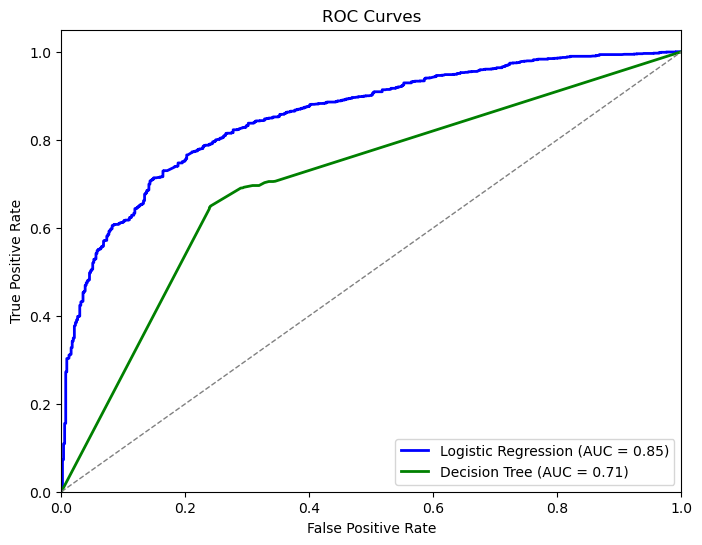

In [69]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_logistic:.2f})')
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label=f'Decision Tree (AUC = {auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

In [70]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

In [91]:
app = dash.Dash(__name__)

colors = {
    'background': 'lightgrey',
    'text': 'black'
}
            
app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(
        children='Customer Churn Prediction for a telecommunication company',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),
    html.Div(children='Pick the right information relevant to the customer and calculate its churn probability.', style={
        'textAlign': 'center',
        'color': colors['text']
    }),
    html.Div([
        html.Div(children = [
            html.Label('Gender'),
            dcc.Dropdown(
                id='gender-dropdown',
                options=[{'label': 'Male', 'value': 'Male'}, {'label': 'Female', 'value': 'Female'}],
                value='Gender'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Senior Citizen'),
            dcc.Dropdown(
                id='senior-citizen-dropdown',
                options=[{'label': str(sc), 'value': sc} for sc in df['SeniorCitizen'].unique()],
                value='Senior Citizen'
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
        html.Div(children = [
            html.Label('Partner'),
            dcc.Dropdown(
                id='partner-dropdown',
                options=[{'label': partner, 'value': partner} for partner in df['Partner'].unique()],
                value='Partner'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Dependents'),
            dcc.Dropdown(
                id='dependents-dropdown',
                options=[{'label': dependent, 'value': dependent} for dependent in df['Dependents'].unique()],
                value='Dependents'
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
        html.Div(children = [
            html.Label('PhoneService'),
            dcc.Dropdown(
                id='phoneservice-dropdown',
                options=[{'label': phoneservice, 'value': phoneservice} for phoneservice in df['PhoneService'].unique()],
                value='Phone Service'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Multiple lines'),
            dcc.Dropdown(
                id='ml-dropdown',
                options=[{'label': str(ml), 'value': ml} for ml in df['MultipleLines'].unique()],
                value='MultipleLines'
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
        html.Div(children = [
            html.Label('Online Security'),
            dcc.Dropdown(
                id='os-dropdown',
                options=[{'label': str(os), 'value': os} for os in df['OnlineSecurity'].unique()],
                value='Online Security'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Internet Service'),
            dcc.Dropdown(
                id='IS-dropdown',
                options=[{'label': str(IS), 'value': IS} for IS in df['InternetService'].unique()],
                value='InternetService'
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
        html.Div(children = [
            html.Label('Streaming TV'),
            dcc.Dropdown(
                id='st-dropdown',
                options=[{'label': str(st), 'value': st} for st in df['StreamingTV'].unique()],
                value='Streaming TV'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Tech Support'),
            dcc.Dropdown(
                id='ts-dropdown',
                options=[{'label': str(ts), 'value': ts} for ts in df['TechSupport'].unique()],
                value='Tech Support'
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
        html.Div(children = [
            html.Label('Streaming Movies'),
            dcc.Dropdown(
                id='sm-dropdown',
                options=[{'label': str(sm), 'value': sm} for sm in df['StreamingMovies'].unique()],
                value= 'Streaming Movies'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Contract'),
            dcc.Dropdown(
                id='contract-dropdown',
                options=[{'label': contract, 'value': contract} for contract in df['Contract'].unique()],
                value='Contract'
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
        html.Div(children = [
            html.Label('Payment Method'),
            dcc.Dropdown(
                id='pm-dropdown',
                options=[{'label': str(pm), 'value': pm} for pm in df['PaymentMethod'].unique()],
                value= 'Payment Method'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Monthly Charges'),
            dcc.Dropdown(
                id='monthlycharges-dropdown',
                options=[{'label': monthlycharges, 'value': monthlycharges} for monthlycharges in df['MonthlyCharges'].unique()],
                value='Monthly Charges'
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
        html.Div(children = [
            html.Label('Paperless Billing'),
            dcc.Dropdown(
                id='pb-dropdown',
                options=[{'label': str(pb), 'value': pb} for pb in df['PaperlessBilling'].unique()],
                value= 'Paperless Billing'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Total Charges'),
            dcc.Dropdown(
                id='totalcharges-dropdown',
                options=[{'label': totalcharges, 'value': totalcharges} for totalcharges in df['TotalCharges'].unique()],
                value='Total Charges'
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
        html.Div(children = [
            html.Label('Customer Type'),
            dcc.Dropdown(
                id='ct-dropdown',
                options=[{'label': str(ct), 'value': ct} for ct in df['CustomerType'].unique()],
                value= 'Customer Type'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
    ]),
    html.Button('Submit'),
    html.Div(id='churn-probability-output')
])

@app.callback(
    Output('churn-probability-output', 'children'),
    Input('gender-dropdown', 'value'),
    Input('senior-citizen-dropdown', 'value'),
    Input('partner-dropdown', 'value'),
    Input('dependents-dropdown', 'value'),
    Input('ct-dropdown', 'value'),
    Input('totalcharges-dropdown', 'value'),
    Input('monthlycharges-dropdown', 'value'),
    Input('pb-dropdown', 'value'),
    Input('pm-dropdown', 'value'),
    Input('sm-dropdown', 'value'),
    Input('ts-dropdown', 'value'),
    Input('st-dropdown', 'value'),
    Input('IS-dropdown', 'value'),
    Input('os-dropdown', 'value'),
    Input('ml-dropdown', 'value'),
    Input('phoneservice-dropdown', 'value')
)
def update_churn_probability(gender, senior_citizen, partner, dependents, phone_service, multiple_lines, internet_service, online_security, tech_support, streaming_tV, streaming_movies, contract, paperless_billing, payment_method, monthly_charges, total_charges, customer_type):
    user_data = pd.DataFrame({
        'Gender': [gender],
        'SeniorCitizen': [senior_citizen],
        'Partner': [partner],
        'Dependents': [dependents],
        'PhoneService': [phone_service],
        'MultipleLines': [multiple_lines],
        'InternetService': [internet_service],
        'OnlineSecurity': [online_security],
        'TechSupport': [tech_support],
        'StreamingTV': [streaming_tV],
        'StreamingMovies': [streaming_movies],
        'Contract': [contract],
        'PaperlessBilling': [paperless_billing],
        'PaymentMethod': [payment_method],
        'MonthlyCharges': [monthly_charges],
        'TotalCharges': [total_charges],
        'CustomerType': [customer_type]
    })
    
    churn_probability = logistic_model.predict_proba(user_data)[:, 1]
    
    return f'Predicted Churn Probability: {churn_probability[0]:.2f}'

if __name__ == '__main__':
    app.run_server(debug=True, port = 8051)
    

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: update_churn_probability() missing 1 required positional argument: 'customer_type'

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: update_churn_probability() missing 1 required positional argument: 'customer_type'

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: update_churn_probability() missing 1 required positional argument: 'customer_type'

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: update_churn_probability() missing 1 required positional argument: 'customer_type'

------------